<a href="https://colab.research.google.com/github/chaehchaeh/MajorAI-NLProgramming/blob/main/230313%EC%9E%90%EC%97%B0%EC%96%B4P7_%EB%8B%AE%EC%9D%80%EA%BC%B4_%EC%97%B0%EC%98%88%EC%9D%B8_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연예인 닮은꼴 인공지능 만들기

## GPU 사용

상단메뉴 - 런타임 - 런타임 유형 변경 - 하드웨어 가속기 - GPU - 저장



## 그래프에서 한글 사용을 위한 준비

Matplotlib 패키지가 한글을 지원하지 않기 때문에 사전 실행 필요 (매번 Colab 접속할 때마다 실행 필요)

In [ ]:
!apt-get install fonts-nanum -qq -y #apt-get는 os에 따라 달라짐 코랩에서는 apt-get을 사용함
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
exit() # 런타임 다시 시작

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 한글 폰트 적용 및 테스트

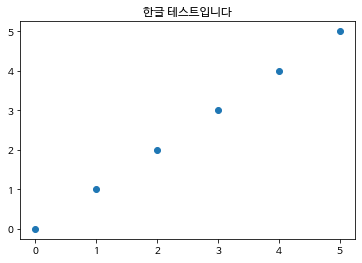

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #한글사용시 폰트 패스 설정해야함
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('한글 테스트입니다')
plt.show()

## 연예인 사진 수집하기

- [jmd_imagescraper](https://joedockrill.github.io/jmd_imagescraper/) 사용

> [DuckDuckGo](https://duckduckgo.com/) 검색 엔진에서 이미지를 크롤링할 수 있게 도와주는 패키지

### 패키지 설치

In [ ]:
!pip install -q jmd_imagescraper #duckduckgo에서 이미지 크롤링하는 명령어
#-q가 없어도 가능하지만 실행내용이 간략하게 표시됨(quite)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00


### 패키지 로드

In [ ]:
from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

### 이미지 수집

- path: 저장 상위 폴더
- label: 저장 하위 폴더 이름
- keywords: 검색 키워드
- max_results: 수집할 사진 개수

In [ ]:
path = 'images' # 저장 상위 폴더
label = '정우성' # 저장 하위 폴더 이름(키워드랑 달라도 됨)
keywords = '정우성' # 검색 키워드
max_results = 200 # 수집할 사진 개수


#데이터 수집함수/4개의 파라미터(path,label,keywords,max_results) 사용함
image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

#반복하면 같은 폴더에 추가로 저장됨
#반복문 사용해서 수집해도 됨

Duckduckgo search: 정우성


### 이미지 수집2

- 정우성
- 송중기
- 강호동
- 곽동연

In [ ]:
path = 'images' # 저장 상위 폴더
label = '송중기' # 저장 하위 폴더 이름
keywords = '송중기' # 검색 키워드
max_results = 200 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 송중기


In [ ]:
path = 'images' # 저장 상위 폴더
label = '강호동' # 저장 하위 폴더 이름
keywords = '강호동' # 검색 키워드
max_results = 200 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 강호동


In [ ]:
path = 'images' # 저장 상위 폴더
label = '곽동연' # 저장 하위 폴더 이름
keywords = '곽동연' # 검색 키워드
max_results = 200 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 곽동연


### 필요없는 이미지 삭제

In [ ]:
display_image_cleaner('images')
#display_image_cleaner('폴더명')

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

### 압축 및 다운로드

In [ ]:
!zip -q -r 'images.zip' images #내컴퓨터로 다운로드
#-r은 하위폴더를 모두라는 뜻
from google.colab import files
files.download('images.zip')
#코랩으로부터 컴퓨터로 다운로드함

## FastAI
* 처리가 아니라 코딩을 빨리할 수 있는 딥러닝 패키지

### 데이터 로드

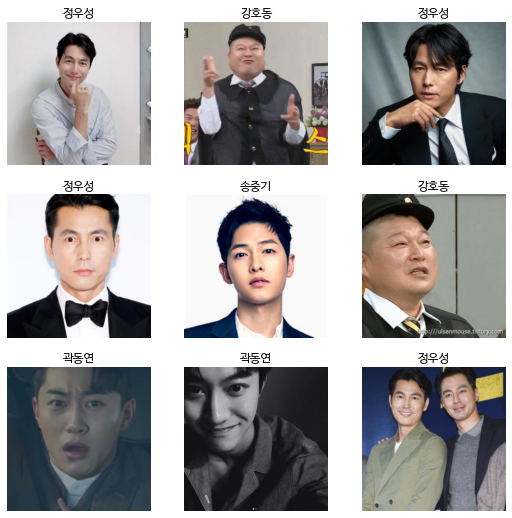

In [ ]:
from fastai.vision.all import *

path = 'images'

block = DataBlock(
    blocks = (ImageBlock, CategoryBlock), #인풋(imageblock),아웃풋(categoryblock)/이미지를 인풋해서 카테고리를 아웃풋함
    get_items = get_image_files, 
    get_y = parent_label,
    item_tfms = Resize(256), #tfms->트랜스포머/이미지사이즈를 동일하게 맞춰줘야함/가로세로224정사각형(작은이미지는 확대해서 해상도 및 정확도가 낮아질 수 있음)
)

loader = block.dataloaders(path)

loader.show_batch() #이미지 확인

### 데이터에 어떤 인물들이 있는지 확인

In [ ]:
loader.train.vocab

['강호동', '곽동연', '송중기', '정우성']

### 훈련/검증 데이터 확인

In [ ]:
len(loader.train.items) #훈련데이터의 개수

979

In [ ]:
len(loader.valid.items) #검증데이터의 개수

244

### 데이터를 나누는 이유

![](https://i.imgur.com/TztMZdo.png)

- 훈련, train : 교과서
- 검증, valid : 모의고사
- 시험, test : 수능

### 모델 정의 및 훈련

#### 파인튜닝 (Fine-tune)

![](https://i.imgur.com/HdLUJ9o.png)

- vision_learner : 컴퓨터 비전을 위한 학습 도구
- resnet34 : 사전 학습된 인공지능 모델 (resnet34, resnet50)
  - 사용할 수 있는 사전 학습 모델 종류
    - PyTorch : https://pytorch.org/vision/main/models/resnet.html
    - fastai : https://docs.fast.ai/vision.models.xresnet.html
- accuracy : 정확도 (0~1)

- fine_tune : 파인튜닝, 사전 학습 모델을 활용하여 새로운 문제를 해결하는 방법
- epochs : 반복 학습 수

자세한 내용 : https://docs.fast.ai/callback.schedule.html#learner.fine_tune

남이 만들어놓은 것을 파인튜닝하기 위한 레스넷(사물분류를 위한 모델)을 사용함
레즈넷의 번호가 클수록 모델의 용량이 커지도 정확도가 올라감
resnet10,34,50,101,152

### 정확도

정확도(Accuracy)는 전체 샘플의 개수들 중에서 얼마나 나의 알고리즘이 정답이라고 예측한 샘플이 포함되었는지의 비율을 의미한다. 예를 들어서, 내 알고리즘이 90% 정확하다면, 100개의 샘플들 중에서 90개만 정확하게 분류하는 것이다.

![](https://i.imgur.com/Bv5yCRC.png)

> 출처: https://m.blog.naver.com/sw4r/221681221173

In [ ]:
learn = vision_learner(loader, resnet101, metrics=accuracy) #vision_learner라는 함수를 사용하여 파인튜닝함/정확도로 모델을 판별할 것, resnet34사용

learn.fine_tune(epochs = 10)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.547456,0.806119,0.790984,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.496912,0.440207,0.872951,00:22
1,0.302203,0.370876,0.901639,00:22
2,0.200760,0.377448,0.901639,00:23
3,0.141232,0.434333,0.926230,00:22
4,0.105253,0.572815,0.897541,00:23
5,0.094602,0.430389,0.913934,00:22
6,0.072618,0.415975,0.918033,00:22
7,0.054652,0.356779,0.934426,00:23
8,0.041382,0.327766,0.938525,00:22
9,0.030746,0.326625,0.942623,00:23


### 훈련 결과

- 위 : 정답
- 아래 : 우리가 훈련시킨 모델의 예측 결과

In [ ]:
learn.show_results()

### 훈련된 모델 저장

In [ ]:
from google.colab import files

learn.export('연예인닮은꼴.pkl') # 훈련된 모델 저장 (나중에 다시 쓸 수 있도록!)
files.download('연예인닮은꼴.pkl') # 모델 다운로드

### 훈련된 모델 로드

훈련된 모델 파일을 가지고 있으면 앞으로는 앞의 훈련 과정이 필요없습니다.

In [ ]:
from fastai.vision.all import *

learn = load_learner('연예인닮은꼴.pkl') # 훈련된 모델 로드

## 새로운 이미지로 테스트

1. 파일 브라우저에서 `test` 폴더 만들기
2. 인터넷에서 이미지 다운로드 받아서(또는 내 사진을) `test` 폴더에 업로드하기
3. 파일 확장자는 jpg

In [ ]:
test_images = get_image_files('test')

test_images

### 새로운 이미지 테스트하기

In [ ]:
pred = learn.predict(test_images[0])

pred

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 예측 결과 살펴보기

In [ ]:
pred[0]

In [ ]:
pred[1]

['강호동', '곽동연', '송중기', '정우성']

In [ ]:
pred[2]

In [ ]:
max(pred[2])

In [ ]:
max(pred[2]) * 100